In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [4]:
from numpy.random import rand, randn

In [5]:
n, d, k = 100, 2, 2

In [6]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [9]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''

    A = np.sqrt( ((2*np.pi) ** d) * np.linalg.det(sigma))
    B = -0.5 * (X-mean).dot(np.linalg.inv(sigma)).dot((X-mean).T)
    
    return 1/A * np.exp(B)

In [10]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [11]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[[0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [['red' 'red' 'green' ... 'green' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']
 ['green' 'red' 'green' ... 'green' 'red' 'red']
 ...
 ['green' 'red' 'green' ... 'green' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']]

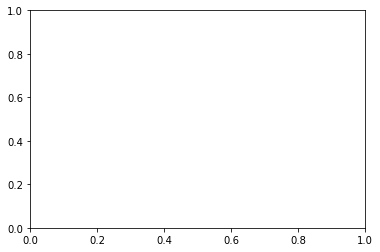

In [12]:
colors = (np.array(['red', 'green'])[assignments])
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()

In [84]:
print(colors)

[['red' 'red' 'green' ... 'green' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']
 ['green' 'red' 'green' ... 'green' 'red' 'red']
 ...
 ['green' 'red' 'green' ... 'green' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']
 ['red' 'red' 'red' ... 'red' 'red' 'red']]
